# YouTube Trending Videos Analysis

## Project Goal
To understand what factors make YouTube videos trend.

## Questions
1. Which video categories appear most in trending videos?
2. Do likes have a relationship with views?
3. Which channels appear repeatedly in trending?
4. Does title length affect number of views?


In [214]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [215]:
df.shape

(40949, 16)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Total 40949 row and 16 columns 


In [216]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Checked null values 
* description has 570 non-null values rest are null so it is less usefull column


Converting columns like 'trending_date' and 'publish_time' into datetime format 

In [217]:
df['trending_date'] = pd.to_datetime(df["trending_date"], format = '%y.%d.%m')

df['publish_time'] = pd.to_datetime(df['publish_time'])

df[['trending_date','publish_time']].head()

,trending_date,publish_time
0,2017-11-14,2017-11-13 17:13:01+00:00
1,2017-11-14,2017-11-13 07:30:00+00:00
2,2017-11-14,2017-11-12 19:05:24+00:00
3,2017-11-14,2017-11-13 11:00:04+00:00
4,2017-11-14,2017-11-12 18:01:41+00:00


In [164]:
# dropping unnecessary columns like description , vid id , thumbnail link

columns_to_drop = ['description','thumbnail_link','video_id']
df.drop(columns = columns_to_drop, inplace = True)

In [218]:
print(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


OBSERVINGLENGHT OF TITLE AFFCETS VIEWS , ALSO CALCULATING LIKES/VIEWS RATIO

In [219]:
 

df['title_length'] = df['title'].apply(len) 

# like/views ratio
df['like_view_ratio'] = df['likes']/ df['views']

df[['title', 'title_length', 'likes', 'views', 'like_view_ratio']].head()

,title,title_length,likes,views,like_view_ratio
0,WE WANT TO TALK ABOUT OUR MARRIAGE,34,57527,748374,0.076869
1,The Trump Presidency: Last Week Tonight with J...,62,97185,2418783,0.040179
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",53,146033,3191434,0.045758
3,Nickelback Lyrics: Real or Fake?,32,10172,343168,0.029641
4,I Dare You: GOING BALD!?,24,132235,2095731,0.063097


In [51]:
# Final dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

Conclusion:
There is no strict linear relationship between views and likes.
While higher views often lead to more likes, engagement varies
based on content quality and audience interest.


#   Question is comments disabled hone se views me frk pdta hai ?

In [205]:
# analysis

In [220]:
df.groupby('comments_disabled')['like_view_ratio'].mean()


comments_disabled
False    0.034754
True     0.012711
Name: like_view_ratio, dtype: float64

In [208]:
# visualization

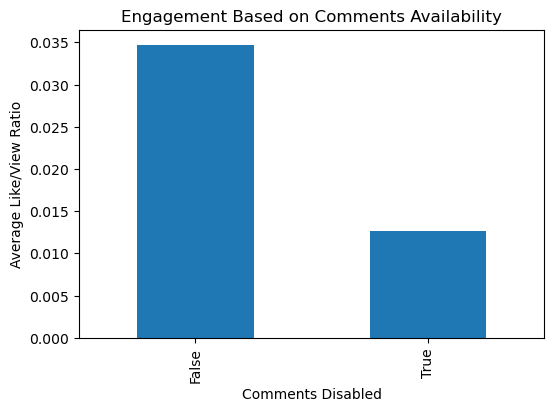

In [221]:
comments_engagement = df.groupby('comments_disabled')['like_view_ratio'].mean()

comments_engagement.plot(kind='bar', figsize=(6,4))
plt.xlabel('Comments Disabled')
plt.ylabel('Average Like/View Ratio')
plt.title('Engagement Based on Comments Availability')
plt.show()


Disabling comments significantly reduces audience engagement.

# Analyzing category and engagement 

In [222]:
category_engagement = (df.groupby('category_id')['like_view_ratio'].mean().sort_values(ascending=False))

In [223]:
category_engagement.head(10)

category_id
10    0.047565
26    0.044993
23    0.043884
22    0.041805
29    0.037904
27    0.037760
20    0.037300
15    0.033471
28    0.030612
24    0.028527
Name: like_view_ratio, dtype: float64

From above insight we came to know the average engagement of content based on category , we arrange these in descending order of avg mean of like n view ratio , now to name the groped category we will use category json file  

# Category id and category name sorting.
# Which type of video gets more engagement?

In [224]:
import json

with open('US_category_id.json','r' , encoding= 'utf-8') as f:
    category_data = json.load(f)


In [225]:
category_dict = {}

for item in category_data['items']:
    category_dict[int(item['id'])] = item['snippet']['title']


In [226]:
df['category_name'] = df['category_id'].map(category_dict)


In [227]:
df[['category_id', 'category_name']]

,category_id,category_name
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment
...,...,...
40944,15,Pets & Animals
40945,22,People & Blogs
40946,24,Entertainment
40947,1,Film & Animation


In [174]:
df.groupby('category_name')['like_view_ratio'] \
  .mean() \
  .sort_values(ascending=False)


category_name
Music                    0.047565
Howto & Style            0.044993
Comedy                   0.043884
People & Blogs           0.041805
Nonprofits & Activism    0.037904
Education                0.037760
Gaming                   0.037300
Pets & Animals           0.033471
Science & Technology     0.030612
Entertainment            0.028527
Film & Animation         0.027419
Shows                    0.022140
Travel & Events          0.020808
Autos & Vehicles         0.016903
Sports                   0.015274
News & Politics          0.012695
Name: like_view_ratio, dtype: float64

In [228]:
category_engagement = (df.groupby(['category_id','category_name'])['like_view_ratio'].mean().sort_values(ascending = False))

In [229]:
category_engagement = category_engagement.reset_index()
category_engagement

,category_id,category_name,like_view_ratio
0,10,Music,0.047565
1,26,Howto & Style,0.044993
2,23,Comedy,0.043884
3,22,People & Blogs,0.041805
4,29,Nonprofits & Activism,0.037904
5,27,Education,0.037760
6,20,Gaming,0.037300
7,15,Pets & Animals,0.033471
8,28,Science & Technology,0.030612
9,24,Entertainment,0.028527


In [230]:
# visualization

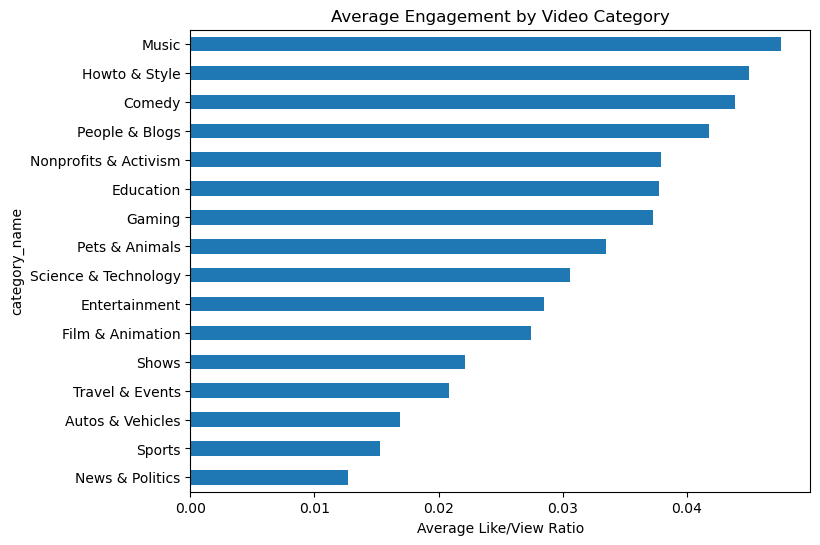

In [231]:
category_engagement = (
    df.groupby('category_name')['like_view_ratio']
      .mean()
      .sort_values()
)

category_engagement.plot(kind='barh', figsize=(8,6))
plt.xlabel('Average Like/View Ratio')
plt.title('Average Engagement by Video Category')
plt.show()


Insight:
Category-wise engagement analysis shows that Music (Category ID: 10) has the highest average like-to-view ratio (~0.047), indicating the strongest audience engagement. This is followed by How-to & Style (Category ID: 26) and Comedy (Category ID: 23).

This suggests that users are more likely to actively engage (like videos) with entertainment-driven and value-providing content, such as music and instructional videos.

# Trending time / publish time vs engagement

In [235]:
df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [236]:
df['publish_time'].head()

0   2017-11-13 17:13:01+00:00
1   2017-11-13 07:30:00+00:00
2   2017-11-12 19:05:24+00:00
3   2017-11-13 11:00:04+00:00
4   2017-11-12 18:01:41+00:00
Name: publish_time, dtype: datetime64[ns, UTC]

In [237]:
# pattern by hour of day or day of a week

In [238]:
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.day_name()

In [239]:
df['publish_hour'].head()


0    17
1     7
2    19
3    11
4    18
Name: publish_hour, dtype: int32

# Publishing_day and Engagement

In [243]:
df['publish_day'].head()

0    Monday
1    Monday
2    Sunday
3    Monday
4    Sunday
Name: publish_day, dtype: object

In [244]:
days_count = df['publish_day'].value_counts()
days_count

publish_day
Friday       7002
Thursday     6950
Tuesday      6786
Wednesday    6762
Monday       6177
Sunday       3679
Saturday     3593
Name: count, dtype: int64

In [245]:
day_summary = (df.groupby('publish_day').agg(
    like_view_ratio = ('like_view_ratio',"mean"),
    video_count = ('like_view_ratio','count')
    )
)
day_summary

,like_view_ratio,video_count
publish_day,,
Friday,0.035242,7002
Monday,0.032526,6177
Saturday,0.033973,3593
Sunday,0.032742,3679
Thursday,0.035298,6950
Tuesday,0.034825,6786
Wednesday,0.035099,6762


In [246]:
print(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'title_length',
       'like_view_ratio', 'category_name', 'publish_hour', 'publish_day'],
      dtype='object')


In [247]:
day_summary = day_summary.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [248]:
day_summary

,like_view_ratio,video_count
publish_day,,
Monday,0.032526,6177
Tuesday,0.034825,6786
Wednesday,0.035099,6762
Thursday,0.035298,6950
Friday,0.035242,7002
Saturday,0.033973,3593
Sunday,0.032742,3679


In [249]:
# visualization

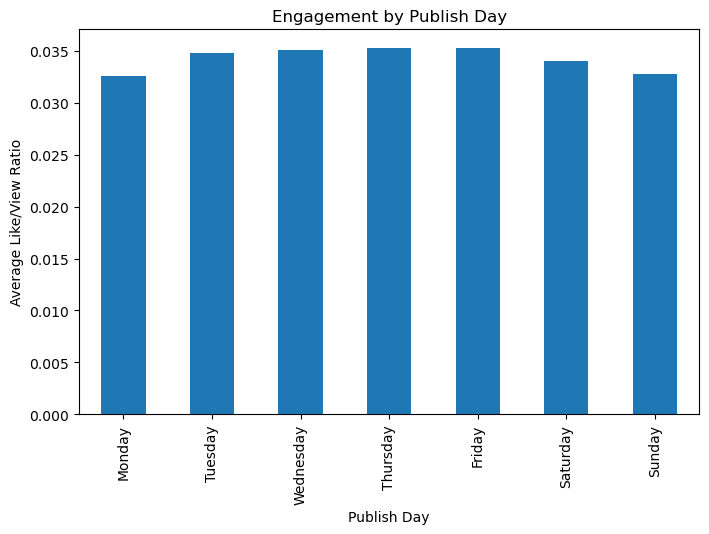

In [250]:
day_engagement = (
    df.groupby('publish_day')['like_view_ratio']
      .mean()
      .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)

day_engagement.plot(kind='bar', figsize=(8,5))
plt.xlabel('Publish Day')
plt.ylabel('Average Like/View Ratio')
plt.title('Engagement by Publish Day')
plt.show()


# Publishing_hour and Engagement

In [251]:
hour_summary = (
    df.groupby('publish_hour').agg(
        avg_like_view_ratio=('like_view_ratio', 'mean'),
        video_count=('like_view_ratio', 'count')
    )
)

In [252]:
hour_summary.sort_values('avg_like_view_ratio',ascending =  False)

,avg_like_view_ratio,video_count
publish_hour,,
19,0.040801,2132
23,0.040528,1495
21,0.039656,2104
22,0.039151,1959
20,0.037783,2136
5,0.037457,1253
16,0.036332,3669
18,0.036223,2889
17,0.035847,3447


In [253]:
# visualization

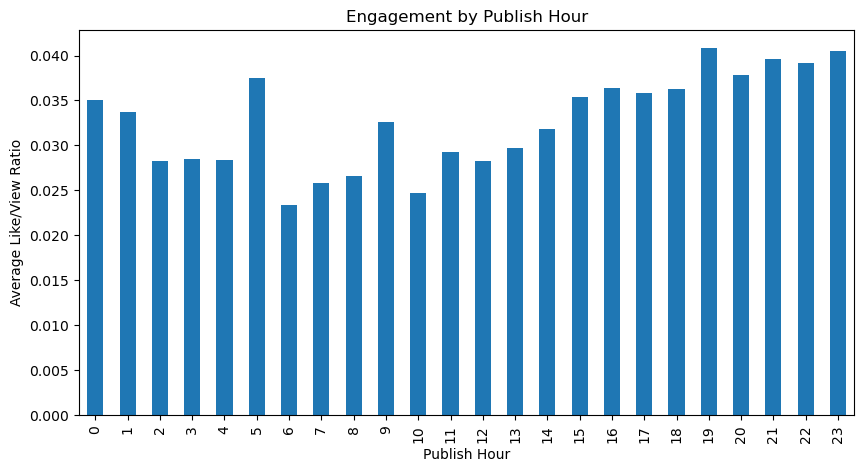

In [254]:
hour_engagement = df.groupby('publish_hour')['like_view_ratio'].mean()

hour_engagement.plot(kind='bar', figsize=(10,5))
plt.xlabel('Publish Hour')
plt.ylabel('Average Like/View Ratio')
plt.title('Engagement by Publish Hour')
plt.show()


# Day-wise analysis indicates that Thursday and Friday show the highest average engagement.
Friday also has the highest number of published videos, suggesting that creators actively upload content on Fridays when audience engagement is strong.

# Conclusion 
 Engagement of audience peak during evening hours from (16:00 - 19:00) that too on the end of workweek (Thursday-Friday), indicating audience is more engaged during this time duration .